In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import sys 
sys.path.append('/scratch/m/murray/dtolgay')
from tools import functions_readfiles as readfiles # type: ignore[import]
from tools import functions_importing_observations as observations # type: ignore[import]
from tools import constants # type: ignore[import]

In [8]:
# Import the gas particles 

galaxy_type = "firebox"
galaxy_name = "gal3"
redshift = "0.0"
directory_name = "voronoi_1e6"

base_fdir = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/runs_hden_radius"
base_fdir = f"{base_fdir}/{galaxy_type}/z{redshift}/{galaxy_name}/{directory_name}"


file_names = {
    "line_emissions": "line_emissions_RBFInterpolator_smoothingLength_2.txt",
    "abundance": "abundance_RBFInterpolator_smoothingLength_2.txt",
    "temperature": "temperature_RBFInterpolator_smoothingLength_2.txt", 
}


counter = 0
for interpolation_type in ["line_emissions", "abundance", "temperature"]:
    path = f"{base_fdir}/{file_names[interpolation_type]}"
    gas_, file_specific_columns_ = readfiles.read_interpolated_files_usingFilePath2(path, interpolation_type)
    # While reading gas particles merge the dataframes
    if counter != 0: 
        gas_ = gas_[["index"] + file_specific_columns_]
        gas = gas.merge(gas_, on="index", how="inner")
    else:
        gas = gas_.copy()

    counter += 1 

In [3]:
# Import observations
herrera_2015, delooze = observations.read_Cii_observations(base_dir="/home/m/murray/dtolgay/Observations")


In [6]:
gas.columns

Index(['index', 'L_ly_alpha', 'L_h_alpha', 'L_h_beta', 'L_co_10', 'L_co_21',
       'L_co_32', 'L_co_43', 'L_co_54', 'L_co_65', 'L_co_76', 'L_co_87',
       'L_13co', 'L_c2', 'L_o3_88', 'L_o3_5006', 'L_o3_4958', 'fh2', 'fCO',
       'fCii', 'fOiii', 'mco_over_mh2', 'visual_extinction_point',
       'visual_extinction_extended', 'Th2', 'Tco', 'T', 'Tcii', 'Toiii'],
      dtype='object')

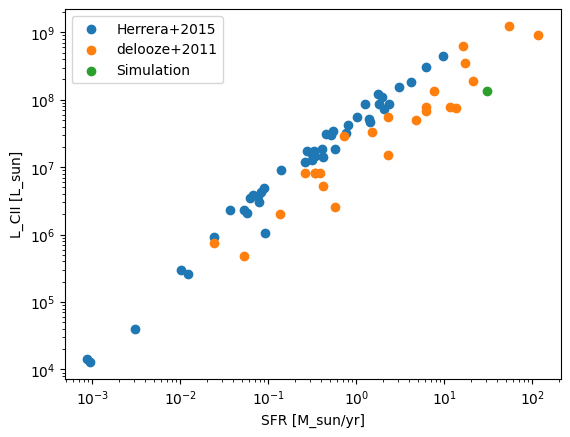

In [11]:

plt.scatter(
    herrera_2015['sfr'],
    herrera_2015['L_c2'],
    label = "Herrera+2015",
)


plt.scatter(
    delooze['sfr'],
    delooze['L_c2'],
    label = "delooze+2011",
)

plt.scatter(
    sum(gas['sfr']),
    sum(gas['L_c2']) * constants.ergs2Lsolar,
    label = "Simulation",
)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("SFR [M_sun/yr]")
plt.ylabel("L_CII [L_sun]")
plt.show()